#  Breast Cancer Detection using Machine Learning
**Author:** Anushka Kandwal
**Goal:** Classify tumors as Benign or Malignant using ML models (Logistic Regression, Random Forest, SVM).  

**This project uses the Breast Cancer Wisconsin Diagnostic dataset from Kaggle. We train multiple models, evaluate them, and create an interactive dashboard for predictions.**

**Tech Stack:** Python | pandas | scikit-learn | matplotlib | seaborn  

**Result:** Achieved ~ 96-97 % accuracy with strong recall for Malignant class.

---
###  Getting Started in Google Colab
1. Upload this notebook to your Google Drive.
2. Open it with **Google Colab**.
3. (Optional) Mount your Drive if your dataset is in Drive:
   ```python
   from google.colab import drive
   drive.mount('/content/drive')
   ```
4. Update the CSV path if needed, then run all cells.

Mount google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## Step 1: Create Project Directory
We first create a dedicated folder in Google Drive to store all project files, including dataset, models, and notebooks. This ensures everything is organized and easy to access.

In [3]:
import os

project_dir = "/content/drive/MyDrive/breast_cancer_project"
os.makedirs(project_dir, exist_ok=True)

print("Project directory created at:", project_dir)


Project directory created at: /content/drive/MyDrive/breast_cancer_project


## Step 2: Upload Kaggle API Key
Used `kaggle.json` file to access Kaggle datasets directly from Colab.


In [4]:
from google.colab import files
files.upload()  # Upload kaggle.json here when prompted


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"anushkakandwal","key":"8045a54bdb65313c2d56912f9a930976"}'}

## Step 3: Configure Kaggle API
We rename and move the uploaded `kaggle.json` to the proper directory (`~/.kaggle`) so that the Kaggle API can access it.


In [5]:
# Rename the file and move to ~/.kaggle directory
!mkdir -p ~/.kaggle
!mv "kaggle (1).json" ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Verify setup
!ls -l ~/.kaggle


total 4
-rw------- 1 root root 70 Oct 24 12:17 kaggle.json


## Step 4: Download and Extract Dataset from Kaggle
We navigate to our project directory in Google Drive, download the Breast Cancer Wisconsin dataset using the Kaggle API,
and unzip it directly into the project folder. This ensures the dataset is stored permanently in Drive for easy access.

In [6]:

%cd "$project_dir"

# Download the dataset
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

# Unzip it into your Drive folder
!unzip -o breast-cancer-wisconsin-data.zip -d "$project_dir"


/content/drive/MyDrive/breast_cancer_project
Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  breast-cancer-wisconsin-data.zip
  inflating: /content/drive/MyDrive/breast_cancer_project/data.csv  


## Step 5: Load Dataset into Pandas
We load the Breast Cancer dataset from our Google Drive project folder into a Pandas DataFrame.
This allows us to perform exploratory data analysis (EDA) and preprocessing on the dataset.

In [7]:
import pandas as pd

data_path = os.path.join(project_dir, "data.csv")
df = pd.read_csv(data_path)

print("Dataset loaded successfully from Drive!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully from Drive!
Shape: (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Step 6: Explore Dataset Structure
We check the dataset shape, column names, and general information to understand the data types,


In [8]:

print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())


print("\nData info:")
df.info()

# Quick look at first few rows
df.head()


Shape: (569, 33)

Column names:
 ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Step 7: Check for Missing Values and Duplicates
 verifing the  data quality by checking for missing values in each column and identifying duplicate rows.
This helps ensure that our dataset is clean before preprocessing and model training.

In [9]:
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Check duplicates
print("\nDuplicates:", df.duplicated().sum())


Missing values per column:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dim

## Step 8: Dataset Distribution
Dataset is checked to see the number of Benign (B) and Malignant (M) cases.
This helps to ensure if the dataset is balanced or imbalanced.

diagnosis
B    357
M    212
Name: count, dtype: int64


/tmp/ipython-input-2856028186.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='Set2')


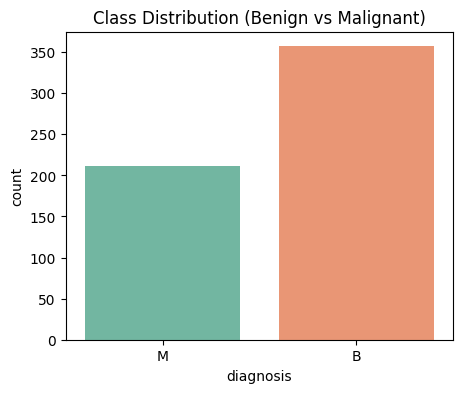

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df['diagnosis'].value_counts())

plt.figure(figsize=(5,4))
sns.countplot(x='diagnosis', data=df, palette='Set2')
plt.title("Class Distribution (Benign vs Malignant)")
plt.show()


### Step 9 : Data Cleaning: Removing Irrelevant Columns

In [11]:
df.drop(columns=['id'], inplace=True)
if 'Unnamed: 32' in df.columns:
    df.drop(columns=['Unnamed: 32'], inplace=True)

print("Remaining columns:", len(df.columns))


Remaining columns: 31


In [12]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].value_counts()


,count
diagnosis,
0,357
1,212


### Feature Correlation Heatmap with Target Variable (`diagnosis`)

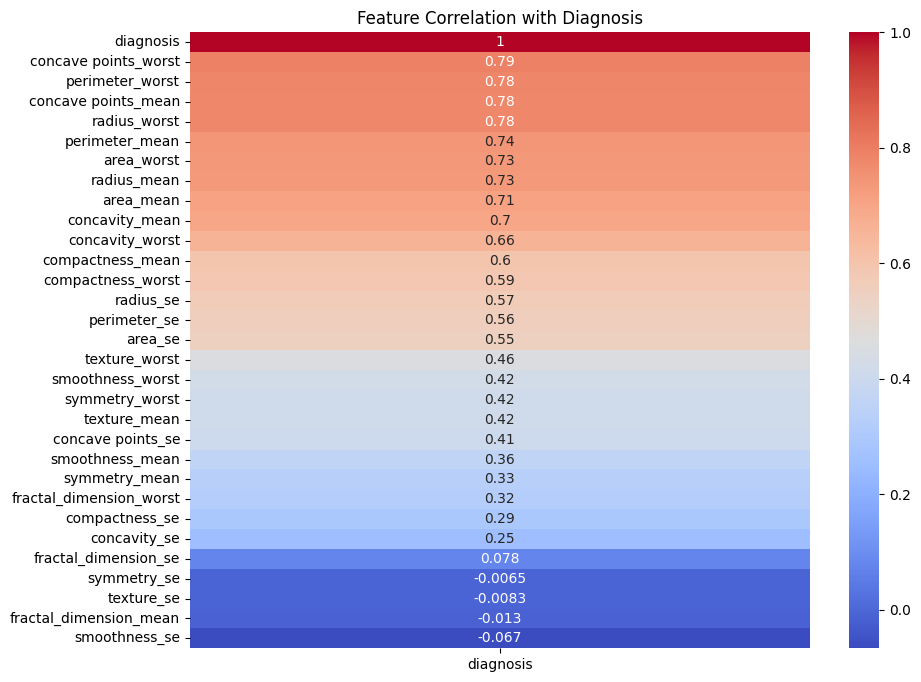

In [13]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr[['diagnosis']].sort_values(by='diagnosis', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Feature Correlation with Diagnosis")
plt.show()


### Data Preparation: Train-Test Split and Feature Scaling

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data scaled successfully.")


Train size: (455, 30)
Test size: (114, 30)
Data scaled successfully.


### Importing libraries

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


### Model 1: Logistic Regression — Training and Evaluation

Logistic Regression Accuracy: 0.9649122807017544

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



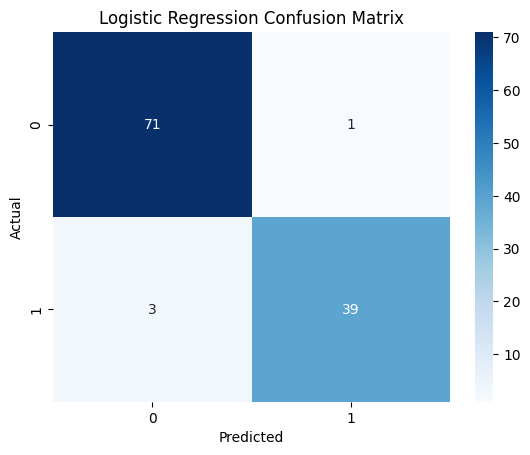

In [16]:
# Initialize and train
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Ensemble Learning with Random Forest for Breast Cancer Classification

Random Forest Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



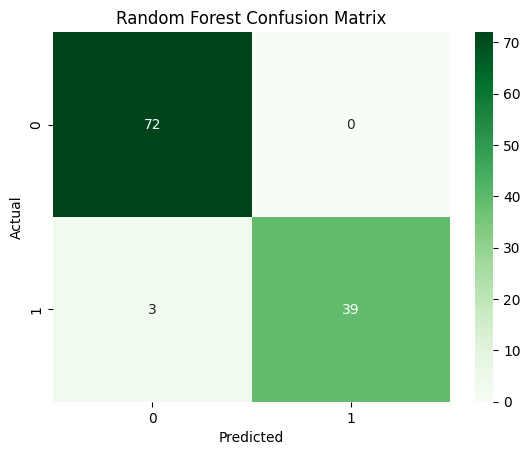

In [17]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Support Vector Machine (SVM) Classification with Performance Evaluation and Visualization

SVM Accuracy: 0.9736842105263158

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



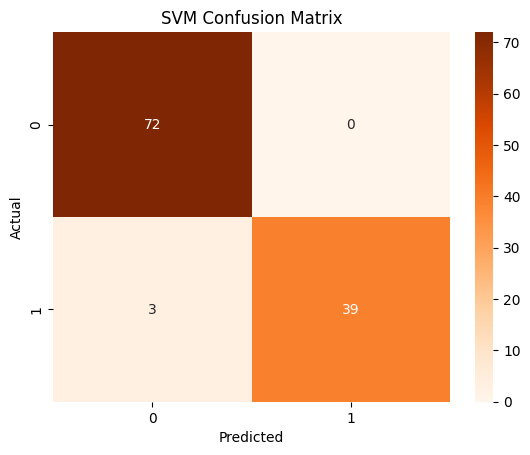

In [18]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### ROC Curve Comparison for Logistic Regression, Random Forest, and SVM Models

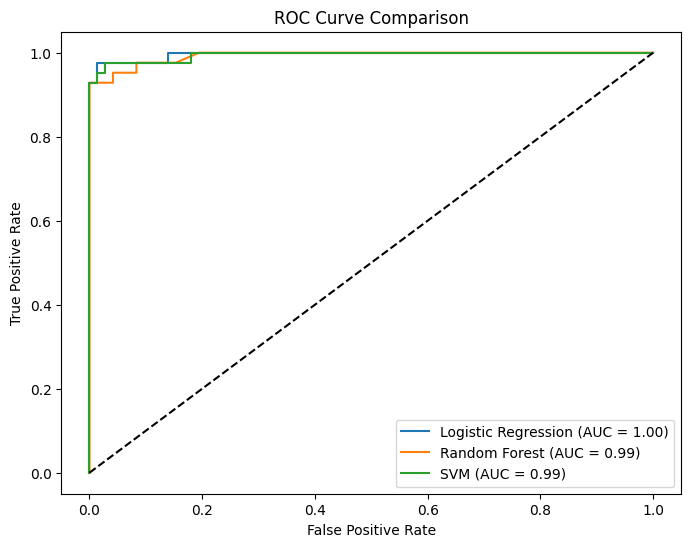

In [19]:
plt.figure(figsize=(8,6))

models = {'Logistic Regression': lr, 'Random Forest': rf, 'SVM': svm}

for name, model in models.items():
    y_prob = model.predict_proba(X_test_scaled)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


### For Model Saving

In [20]:
!pip install -q joblib

import joblib


### Selecting and Saving the Best Model (Random Forest)

In [21]:
best_model = rf  # Random Forest


In [22]:
model_path = os.path.join(project_dir, "best_model.pkl")
scaler_path = os.path.join(project_dir, "scaler.pkl")

# Save the trained model
joblib.dump(best_model, model_path)

# Save the scaler used for feature scaling
joblib.dump(scaler, scaler_path)

print("Model saved at:", model_path)
print("Scaler saved at:", scaler_path)


Model saved at: /content/drive/MyDrive/breast_cancer_project/best_model.pkl
Scaler saved at: /content/drive/MyDrive/breast_cancer_project/scaler.pkl


###Saving Trained Model and Scaler for Deployment Using Joblib

In [23]:
# Load model & scaler from Drive
loaded_model = joblib.load(model_path)
loaded_scaler = joblib.load(scaler_path)

# Example: predict on first 5 test samples
X_sample = X_test.iloc[:5]
X_sample_scaled = loaded_scaler.transform(X_sample)
preds = loaded_model.predict(X_sample_scaled)
print("Predictions (0=Benign, 1=Malignant):", preds)


Predictions (0=Benign, 1=Malignant): [0 1 0 1 0]


### Breast Cancer Prediction Function Using Trained Random Forest Model

In [24]:
def predict_breast_cancer(model, scaler, input_data):
    """
    Predict breast cancer based on input features.

    Parameters:
    - model: trained ML model (Random Forest)
    - scaler: fitted StandardScaler
    - input_data: pandas DataFrame with the same features as training data

    Returns:
    - predictions: list of 'Benign' or 'Malignant'
    """
    # Scale features
    input_scaled = scaler.transform(input_data)

    # Predict
    pred_numeric = model.predict(input_scaled)

    # Convert to human-readable
    pred_labels = ['Benign' if x==0 else 'Malignant' for x in pred_numeric]

    return pred_labels


###Sample Predictions and Comparison with Actual Labels

In [25]:
# Select first 5 test samples
X_sample = X_test.iloc[:5]

# Make predictions
predictions = predict_breast_cancer(loaded_model, loaded_scaler, X_sample)
print("Predictions:", predictions)

# Compare with actual labels
print("Actual:", ['Malignant' if x==1 else 'Benign' for x in y_test.iloc[:5]])


Predictions: ['Benign', 'Malignant', 'Benign', 'Malignant', 'Benign']
Actual: ['Benign', 'Malignant', 'Benign', 'Malignant', 'Benign']


### Interactive Widget Setup for User Input in Breast Cancer Prediction

In [26]:
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Feature names in correct order
feature_names = X_train.columns.tolist()

# Pre-fill with mean values from training data
feature_means = X_train.mean()


### Creating Scrollable Input Form for Interactive Feature Entry

In [27]:
# Dictionary to hold widgets
feature_widgets = {}

# VBox children list
widget_list = []

for f in feature_names:
    w = widgets.FloatText(
        value=float(feature_means[f]),
        description=f,
        step=0.01,
        layout=widgets.Layout(width='350px')
    )
    feature_widgets[f] = w
    widget_list.append(w)

# Make scrollable container
input_form = widgets.VBox(widget_list, layout=widgets.Layout(
    height='500px', overflow_y='scroll', border='1px solid gray', padding='10px'
))
display(input_form)


### Interactive Breast Cancer Prediction with Real-Time Confidence Output

In [28]:
predict_button = widgets.Button(description="Predict Breast Cancer", button_style='success')
output = widgets.Output()

def on_predict_clicked(b):
    with output:
        output.clear_output()
        # Read input values in correct order
        input_data = {f: [feature_widgets[f].value] for f in feature_names}
        input_df = pd.DataFrame(input_data)

        # Predict
        pred_label = predict_breast_cancer(loaded_model, loaded_scaler, input_df)[0]
        prob = loaded_model.predict_proba(loaded_scaler.transform(input_df))[0][1]

        print(f"Prediction: {pred_label}")
        print(f"Confidence (Malignant probability): {prob*100:.2f}%")

predict_button.on_click(on_predict_clicked)
display(predict_button, output)



Button(button_style='success', description='Predict Breast Cancer', style=ButtonStyle())

Output()